In [157]:
import numpy
import matplotlib.pyplot as plt
import scipy.special

In [158]:
data_file = open("E:\OneDrive\文档\数据集\手写数字MNIST\mnist_train_100.txt","r")
data_list = data_file.readlines()
data_file.close()

在对文件数据进行操作时不能先关闭文件
调用方法时要记得加括号

In [159]:
# len(data_list)
# print(data_list)

d:\Anaconda3\envs\pytorch38\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


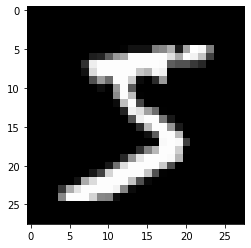

In [160]:
from configparser import Interpolation
from numpy import imag


all_values = data_list[0].split(',')
imag_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(imag_array,cmap="gray",Interpolation='none')
plt.show()

plt.imshow()后面加上plt.show()才能显示，plt.imshow()仅仅是生成图像

In [161]:
class neuralNetwork:
    # 初始化
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        # 设置输入层，隐藏层，输出层的节点数
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # 定义链接的权重矩阵，此处是根据正态分布初始化
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))

        # 设置学习率
        self.lr = learningrate

        # 定义激活函数
        self.activation_function = lambda x:scipy.special.expit(x) 
        pass

    # 训练
    def train(self,input_list,output_list):
        # 将列表转为数组
        inputs = numpy.array(input_list,ndmin=2).T
        targets  = numpy.array(output_list,ndmin=2).T

        # 计算隐藏层的输入
        hidden_inputs = numpy.dot(self.wih,inputs)
        # 将结果输入激活函数作为下一层的输入
        hidden_outputs =self.activation_function(hidden_inputs)
        # 计算输出层的输入
        final_inputs = numpy.dot(self.who,hidden_outputs)
        # 将结果输入激活函数作为最后输出
        final_outputs = self.activation_function(final_inputs)

        # 计算误差
        output_errors = targets-final_outputs
        hidden_errors = numpy.dot(self.who.T,output_errors)

        # 更新权重
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))

    def query(self,input_list):
            # 将列表转为数组
            inputs = numpy.array(input_list,ndmin=2).T

            # 计算隐藏层的输入
            hidden_inputs = numpy.dot(self.wih,inputs)
            # 将结果输入激活函数作为下一层的输入
            hidden_outputs =self.activation_function(hidden_inputs)
            # 计算输出层的输入
            final_inputs = numpy.dot(self.who,hidden_outputs)
            # 将结果输入激活函数作为最后输出
            final_outputs = self.activation_function(final_inputs)

            return final_outputs


训练模型

In [162]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1
epoch = 50

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [163]:
training_data_file = open("E:\OneDrive\文档\数据集\手写数字MNIST\mnist_train_100.txt","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [164]:
for i in range(epoch):
    for record in training_data_list:
        all_values = record.split(",")
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.1
        targets = numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99
        outputs = n.train(inputs,targets)

测试模型

In [165]:
test_data_file = open("E:\OneDrive\文档\数据集\手写数字MNIST\mnist_test_10.txt","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [166]:
# 获取测试集的第一个值
all_values2 = test_data_list[0].split(",")
print(all_values2[0])

7


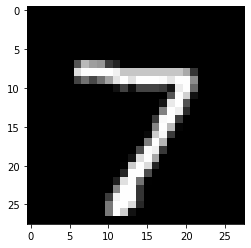

In [167]:
image_array = numpy.asfarray(all_values2[1:]).reshape((28,28))
plt.imshow(image_array,cmap="gray",interpolation='none')
plt.show()

In [168]:
n.query((numpy.asfarray(all_values2[1:])/255.0*0.99)+0.1)

array([[0.01224118],
       [0.00445431],
       [0.03148557],
       [0.01233577],
       [0.00438021],
       [0.03198868],
       [0.00109165],
       [0.96160137],
       [0.00850337],
       [0.01706819]])

In [169]:
scorecard = []

for code in test_data_list:
    all_values = code.split(",")
    correct_label = int(all_values[0])
    print(correct_label,"correct_label")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(label,"answer")
    if(correct_label==label):
        scorecard.append(1)
    else:
        scorecard.append(0)

7 correct_label
7 answer
2 correct_label
2 answer
1 correct_label
1 answer
0 correct_label
0 answer
4 correct_label
4 answer
1 correct_label
1 answer
4 correct_label
9 answer
9 correct_label
4 answer
5 correct_label
1 answer
9 correct_label
9 answer
0 correct_label
0 answer
6 correct_label
9 answer
9 correct_label
7 answer
0 correct_label
0 answer
1 correct_label
1 answer
5 correct_label
3 answer
9 correct_label
7 answer
7 correct_label
7 answer
3 correct_label
3 answer
4 correct_label
4 answer
9 correct_label
9 answer
6 correct_label
6 answer
6 correct_label
1 answer
5 correct_label
5 answer
4 correct_label
4 answer
0 correct_label
0 answer
7 correct_label
7 answer
4 correct_label
4 answer
0 correct_label
0 answer
1 correct_label
1 answer
3 correct_label
3 answer
1 correct_label
1 answer
3 correct_label
3 answer
4 correct_label
4 answer
7 correct_label
8 answer
2 correct_label
2 answer
7 correct_label
7 answer
1 correct_label
1 answer
2 correct_label
1 answer
1 correct_label
1 answer


In [170]:
print(scorecard)
scorecard_array = numpy.asarray(scorecard) 
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
performance =  0.74
